# User Engagement Analysis - Data Analyst @ Showwcase

This sheet will help to understand the "user engagement" on the Showwcase platform for the month of October, 2019. Based on the given dataset, analytics as per different parameters is generated. 

To better understand the project and the process, it has been divided into three sections:
1) Data Loading
2) Data Cleaning and Transformation
3) Data Analysis

## Data Loading

In [207]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [208]:
df = pd.read_csv('showwcase_sessions.csv')

In [209]:
df.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0


In [210]:
df.shape

(302, 14)

In [211]:
df.dtypes

session_id                float64
customer_id               float64
login_date                 object
projects_added             object
likes_given                object
comment_given              object
inactive_status            object
bug_occured                object
session_projects_added    float64
session_likes_given       float64
session_comments_given    float64
inactive_duration         float64
bugs_in_session           float64
session_duration          float64
dtype: object

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              300 non-null    float64
 1   customer_id             300 non-null    float64
 2   login_date              300 non-null    object 
 3   projects_added          300 non-null    object 
 4   likes_given             300 non-null    object 
 5   comment_given           300 non-null    object 
 6   inactive_status         300 non-null    object 
 7   bug_occured             300 non-null    object 
 8   session_projects_added  300 non-null    float64
 9   session_likes_given     299 non-null    float64
 10  session_comments_given  300 non-null    float64
 11  inactive_duration       300 non-null    float64
 12  bugs_in_session         300 non-null    float64
 13  session_duration        300 non-null    float64
dtypes: float64(8), object(6)
memory usage: 33.

In [213]:
df.describe()

,session_id,customer_id,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
count,300.000000,300.000000,300.000000,299.000000,300.000000,300.000000,300.000000,300.000000
mean,530643.296667,44956.766667,1.620000,10.458194,2.406667,732.933333,1.233333,1186.763333
std,280421.371240,26411.336491,1.334743,9.474839,2.247545,838.143032,1.757608,688.632138
min,22885.000000,10246.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,308358.000000,23571.250000,1.000000,0.000000,0.750000,0.000000,0.000000,611.250000
50%,553675.000000,38967.000000,2.000000,9.000000,2.000000,313.500000,0.000000,1152.000000
75%,804120.250000,73245.000000,3.000000,19.000000,4.000000,1524.750000,2.250000,1778.000000
max,999480.000000,98653.000000,9.000000,27.000000,21.000000,2480.000000,5.000000,2395.000000


## Data Cleaning and Transformation

In [214]:
#To Check for duplicates inorder to avoid redundant data.

df.duplicated().sum()

1

In [215]:
df.drop_duplicates(keep='first',inplace=True)

In [216]:
df.duplicated().sum()

0

In [217]:
# To check for null values to reduce their impact on aggregate functions

df[df.isnull().any(axis=1)]

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
35,862128.0,23404.0,10/26/19,True,False,True,True,False,2.0,NaN,2.0,1120.0,0.0,95.0
300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
df.isnull().any(axis=1).sum()

2

In [219]:
df.drop([df.index[35] , df.index[300]], inplace=True)

In [220]:
df.isnull().any(axis=1).sum()

0

In [221]:
#Convert login_date to Date Type to extract relevant information in future

df.login_date = pd.to_datetime(df['login_date'])

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 299
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   session_id              299 non-null    float64       
 1   customer_id             299 non-null    float64       
 2   login_date              299 non-null    datetime64[ns]
 3   projects_added          299 non-null    object        
 4   likes_given             299 non-null    object        
 5   comment_given           299 non-null    object        
 6   inactive_status         299 non-null    object        
 7   bug_occured             299 non-null    object        
 8   session_projects_added  299 non-null    float64       
 9   session_likes_given     299 non-null    float64       
 10  session_comments_given  299 non-null    float64       
 11  inactive_duration       299 non-null    float64       
 12  bugs_in_session         299 non-null    float64   

##  Data Analysis

>In the following section, five research questions are answered, using the cleaned and transformed dataset of the previous section.

### To find customers with most frequent number of sessions, such that they are longer than the mean duration of sessions

In [223]:
df_1 = df['customer_id'].nunique()
print('Total number of customers:', df_1)

Total number of customers: 48


In [224]:
df1 = df[df['session_duration'] > df.session_duration.mean()] 
df1 = df1.groupby('customer_id')['session_id'].count().reset_index(name="total_sessions")
df1.sort_values(by=['total_sessions'],ascending=False).reset_index(drop=True).head(10)

,customer_id,total_sessions
0,23404.0,11
1,29375.0,11
2,40235.0,9
3,14354.0,8
4,38459.0,8
5,87265.0,7
6,87323.0,7
7,40572.0,6
8,73245.0,6
9,23985.0,5


> **Inference:
These users are the people who are more actively present on the website. Such users could be a good option to obtain feedback regarding what to add more or what to improve on the website. These users could also be provided certain benefits to maintain their interest in the website for the longer run.**

### Total number of sessions per day

In [225]:
ans1 = df.groupby('login_date')['session_id'].count().reset_index(name="total_sessions")
ans1.head()

,login_date,total_sessions
0,2019-10-01,9
1,2019-10-02,5
2,2019-10-03,10
3,2019-10-04,9
4,2019-10-05,14


In [226]:
avg_sessions_per_day = ans1['total_sessions'].mean()
avg_sessions_per_day

9.966666666666667

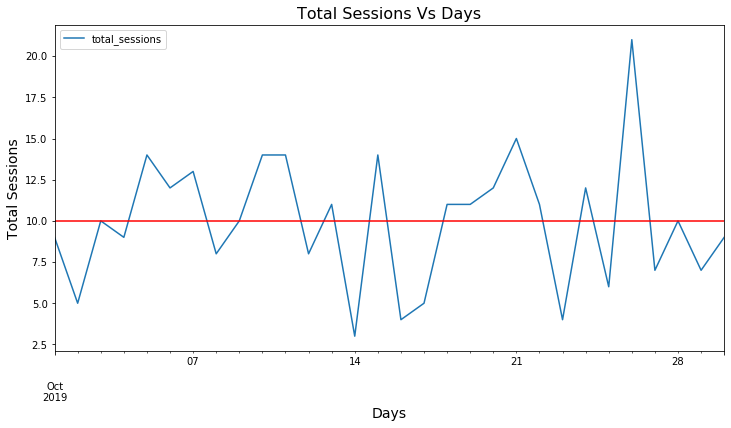

In [227]:
#In the following bar graph, the above answers can be viewed in a graphical manner.


ans1.plot(x='login_date', y='total_sessions',kind='line',figsize=(12,6));
plt.axhline(y=avg_sessions_per_day, color='r', linestyle='-');
plt.xlabel('Days', fontsize = 14);
plt.ylabel('Total Sessions', fontsize = 14);
plt.title('Total Sessions Vs Days', fontsize = 16);

> **Inference: From the above visualization, it can be stated that the total number of sessions for most days of October were above the average total sessions per day. The most significant raise in the total number of sessions was around '2019-10-25' whereas the least number of total sessions was recorded around '2019-10-14'.**

## To check whether users are uploading projects on the portal during a session

In [228]:
insight1 = df.projects_added.value_counts()
insight1

True     226
False     73
Name: projects_added, dtype: int64

In [229]:
ans2 = pd.DataFrame({'Uploaded': ['True', 'False'],
                   'Number of Users': [226, 73]})
ans2.set_index('Uploaded', inplace=True)
print(ans2)

          Number of Users
Uploaded                 
True                  226
False                  73


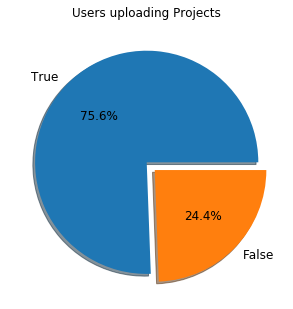

In [230]:
plot = ans2.plot.pie(y='Number of Users', figsize=(5,6), fontsize=12, title="Users uploading Projects", 
                   legend=False, autopct='%1.1f%%', explode = (0, 0.1), \
                   shadow=True, startangle=0)
plt.ylabel('');

> **Inference: We can observe that 75.6% of total users are uploading projects on the portal during a session, while 24.4% users are not uploading any projects during the session.**

## Percentage of sessions with bugs

In [231]:
df4 = df[df['bugs_in_session'] > 1.0]
total_sessions_bugs = df4['session_id'].count()
print('Sessions with more than 1 bug: ',total_sessions_bugs)

Sessions with more than 1 bug:  103


In [232]:
total_sessions = df['session_id'].count()
print('Total Number of Sessions: ',total_sessions)

Total Number of Sessions:  299


In [233]:
ans4 = (total_sessions_bugs / total_sessions) * 100
print('Percentage of Sessions with bugs: ',ans4)

Percentage of Sessions with bugs:  34.448160535117054


> **Inference : This question answers how much percent of sessions are having multiple bugs. Since, it is alarmingly higher, it could be one reason that affects the user experience. So, a goal to minimize this percentage can be a step in the right direction.**

## To check whether user inactivity was related to the bugs on the website

In [234]:
df5 = df[df['inactive_status'] == True]

In [235]:
df5 = df5[df['inactive_duration'] >= 1500.00]

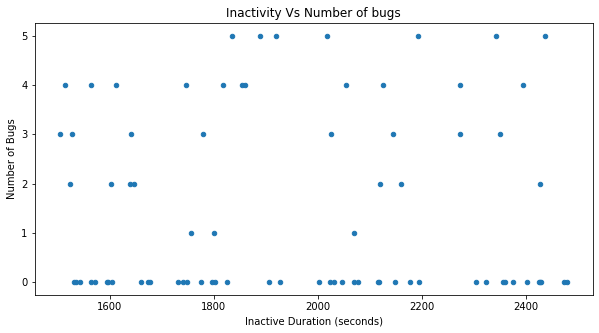

In [236]:
df5.plot(x='inactive_duration', y ='bugs_in_session', kind='scatter', figsize=(10,5));
plt.ylabel('Number of Bugs')
plt.xlabel('Inactive Duration (seconds)')
plt.title('Inactivity Vs Number of bugs');

> **Inference : It can be seen from above that there are two hypothesis. One where many sessions had zero bugs still users were inactive and other being multiple bugs could be a reason for inactivity. So, a definite conclusion could not be drawn from this and more paramters need to be analyzed against inactive sessions to understand user behaviour.**